## Mileage Prediction

Data Source: This dataset was taken from Statlib library which is maintained at Carnegie Mellon University

Import Library

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

Import Data


In [3]:
mpg= pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

Describe Data

In [4]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [5]:
mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [6]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [7]:
mpg.shape

(398, 9)

In [8]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

Data preprocessing

In [9]:
mpg.corr()

<ipython-input-9-29f2cbb04a8f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mpg.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


In [34]:
mpg.dropna(inplace=True)

Data Visualization

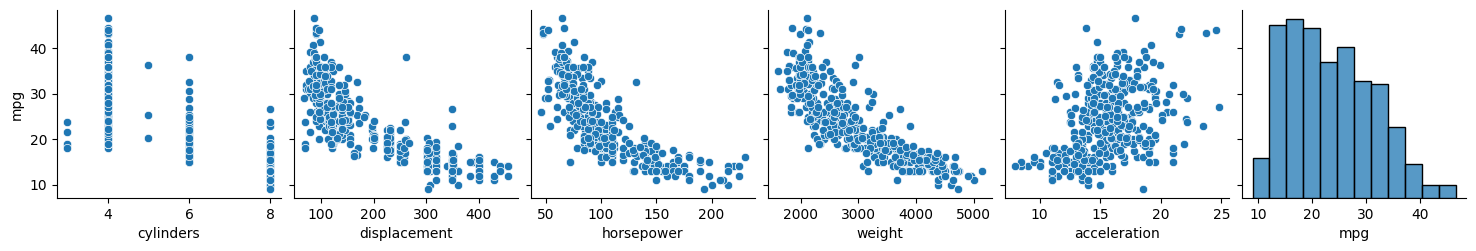

In [35]:
sns.pairplot(mpg, x_vars= ['cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'mpg'], y_vars=['mpg']);

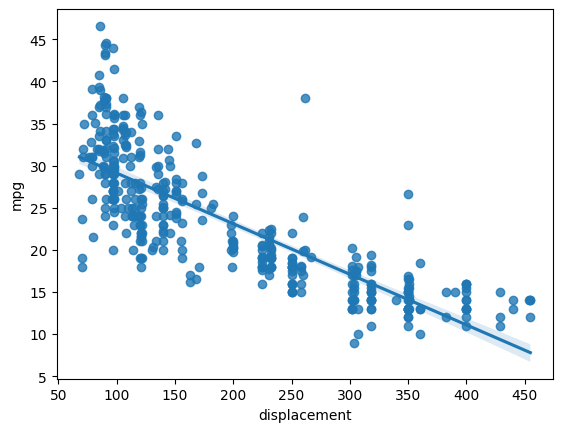

In [36]:
sns.regplot(x= 'displacement',y= 'mpg', data=mpg);

Defining Traget Variables: Independent(X), dependent (y)

In [37]:
X= mpg.drop(['cylinders', 'model_year', 'origin', 'name','mpg'], axis=1)
y= mpg['mpg']

In [38]:
X.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


Scaling Data

In [39]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [40]:
X= ss.fit_transform(X)

In [41]:
X

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

In [42]:
pd.DataFrame(X).describe()

,0,1,2,3
count,3.920000e+02,3.920000e+02,3.920000e+02,3.920000e+02
mean,-7.250436e-17,-1.812609e-16,-1.812609e-17,4.350262e-16
std,1.001278e+00,1.001278e+00,1.001278e+00,1.001278e+00
min,-1.209563e+00,-1.520975e+00,-1.608575e+00,-2.736983e+00
25%,-8.555316e-01,-7.665929e-01,-8.868535e-01,-6.410551e-01
50%,-4.153842e-01,-2.853488e-01,-2.052109e-01,-1.499869e-02
75%,7.782764e-01,5.600800e-01,7.510927e-01,5.384714e-01
max,2.493416e+00,3.265452e+00,2.549061e+00,3.360262e+00


Train test split

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test= train_test_split(X,y)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((294, 4), (98, 4), (294,), (98,))

Linear Regression Model

In [45]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [46]:
model.fit(X_train, y_train)

LinearRegression()

In [47]:
model.coef_

array([-5.35000866e-01, -1.80802637e+00, -4.39427693e+00,  8.16757760e-04])

In [48]:
model.intercept_

23.554687783583553

Prediction

In [50]:
y_pred= model.predict(X_test)
y_pred

array([21.62417687, 21.25800229, 29.7334705 , 15.13034666, 30.6726353 ,
       30.93631265, 11.48421586, 32.72335352, 28.7178531 , 22.55936167,
       18.76401629, 23.33750179, 29.97962564, 21.30021337, 20.73981762,
       16.47312544, 15.97337329, 23.19738365, 15.30590412, 28.34821762,
       19.31908349, 20.75157959, 27.47600104, 28.21228601, 17.25401247,
       16.11237271, 27.58484411, 29.81226845, 30.43814225, 25.83695022,
       22.36424218, 32.56465426, 14.00954051, 30.14250494, 23.99229818,
       20.12066691, 31.46709456, 15.95996848, 25.82978419, 16.75314717,
       26.39193415, 26.00957653,  9.02624221, 27.07634881, 18.40467315,
       32.06963333, 31.10018043, 27.68710763, 13.05822873, 20.20057274,
       29.06289619, 30.78393529, 19.55299895, 24.73062136, 31.95707492,
       30.59512884, 16.11471217, 31.59687957, 29.61760099, 25.00313484,
       10.89070671, 30.85206678, 30.08630924, 23.53226668, 13.52412016,
       24.1439405 , 23.96340775, 21.90330322, 29.66076121, 16.92

Model Accuracy

In [51]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

In [52]:
mean_absolute_percentage_error(y_pred, y_test)

0.1380217215211038

In [53]:
mean_absolute_error(y_pred, y_test)

3.195929237048593

In [54]:
r2_score(y_pred,y_test)

0.5583316136942957

Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [59]:
poly= PolynomialFeatures(degree=2,interaction_only=True , include_bias=False)

In [60]:
X_train2= poly.fit_transform(X_train)

In [61]:
X_test2= poly.fit_transform(X_test)

In [62]:
model.fit(X_train2, y_train)

LinearRegression()

In [63]:
model.coef_

array([-2.13303861, -5.65774269, -1.59805424, -1.09548494,  0.91066865,
        0.38612311, -0.32796013,  1.17988379, -0.87672752,  1.28179861])

In [64]:
model.intercept_

21.068633906266022

In [65]:
y_pred2= model.predict(X_test2)

In [66]:
y_pred2

array([19.55756667, 19.50429295, 29.22870682, 14.41893208, 31.58821054,
       32.86277409, 13.72100429, 35.87877128, 28.63064418, 19.99031214,
       15.32792596, 21.86178961, 31.21615428, 19.52371001, 19.40729123,
       15.76236497, 15.32763231, 24.36643279, 14.63070852, 27.74212268,
       19.11101605, 18.98926557, 27.78583989, 26.25083358, 15.52440722,
       14.88229379, 25.00974644, 30.88079373, 31.0190743 , 28.72057945,
       21.43063438, 36.73685498, 16.06424085, 32.67647922, 22.98915336,
       19.72695569, 33.97169397, 14.83895362, 24.9186796 , 14.10883001,
       25.94248661, 24.62798475, 11.14422127, 26.6179266 , 16.27364634,
       33.17554589, 33.57619127, 27.91774663, 13.57136907, 17.5524885 ,
       28.41770156, 32.80301241, 18.13500664, 22.71764774, 34.59270933,
       31.10825091, 14.69201065, 34.92164625, 30.54382108, 24.20514176,
       14.75748942, 32.02026992, 31.06348504, 20.18541664, 13.87270161,
       21.56297005, 23.33580411, 20.12568287, 32.42534602, 17.34

In [67]:
mean_absolute_percentage_error(y_pred2, y_test)

0.12252185873859239

In [68]:
mean_absolute_error(y_pred2,y_test)

2.9458555089708534

In [69]:
r2_score(y_pred2, y_test)

0.6506706300395786